### Project: Bankruptcy Prevention
Project: Bankruptcy Prevention
Business Objective:
This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.
The data file contains 7 features about 250 companies
The data set includes the following variables:
- industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
- management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
- financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
- credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
- competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
- operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
- class: bankruptcy, non-bankruptcy (target variable).



## Import the essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report


from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## Import the data

In [2]:
df = pd.read_csv('Bankruptcy-prevention.csv', sep=";")
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


## Understanding the data

In [3]:
df.shape

(250, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
df.isna().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

- Here we can see that there is no null values present in the data set

In [6]:
df.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [7]:
df.industrial_risk.value_counts()

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

In [28]:
df.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


In [29]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [30]:
df1= df.copy()
# to rename all the columns as the column names as very long and has spaces
df1.rename(columns={'industrial_risk':'ind_risk',
                    ' management_risk':'mgmt_risk',
                     ' financial_flexibility': 'fin_flex',
                      ' credibility':'cred',
                       ' competitiveness':'compt',
                        ' operating_risk':'opert_risk',
                         ' class':'class'}, inplace=True)

In [31]:
df1.head()

,ind_risk,mgmt_risk,fin_flex,cred,compt,opert_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [32]:
df1.columns

Index(['ind_risk', 'mgmt_risk', 'fin_flex', 'cred', 'compt', 'opert_risk',
       'class'],
      dtype='object')

## Visualisation

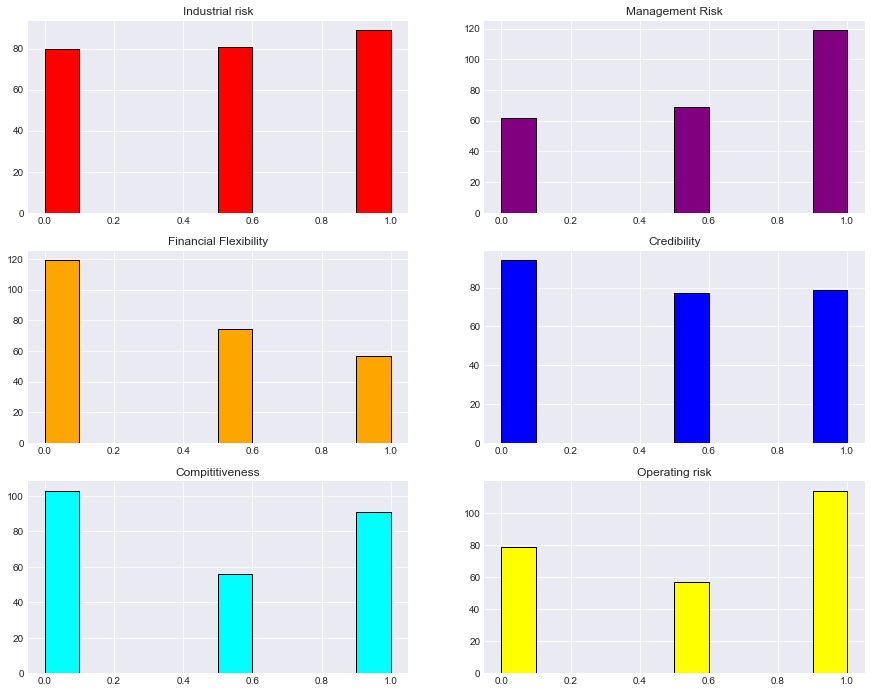

In [58]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,12), facecolor= 'white')

plt.subplot(3,2,1)
plt.hist(df1['ind_risk'], color= 'r', edgecolor='black')
plt.title('Industrial risk')


plt.subplot(3,2,2)
plt.hist(df1['mgmt_risk'], color= 'purple', edgecolor='black')
plt.title('Management Risk')


plt.subplot(3,2,3)
plt.hist(df1['fin_flex'], color= 'orange', edgecolor='black')
plt.title('Financial Flexibility')


plt.subplot(3,2,4)
plt.hist(df1['cred'], color= 'blue', edgecolor='black')
plt.title('Credibility')


plt.subplot(3,2,5)
plt.hist(df1['compt'], color= 'cyan', edgecolor='black')
plt.title('Compititiveness')



plt.subplot(3,2,6)
plt.hist(df1['opert_risk'], color= 'yellow', edgecolor='black')
plt.title('Operating risk')

plt.show()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64


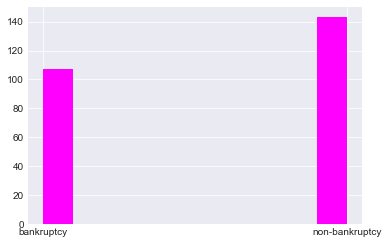

In [59]:
plt.style.use('seaborn-darkgrid')
plt.hist(df1['class'], color= 'magenta')
print(df1['class'].value_counts())

#### we can see here that the class data is nearly balanced

## Feature Engineering
### Feature selection using correlation matrix

In [88]:
x= df1.drop(labels= 'class', axis=1)
y= df1[['class']]


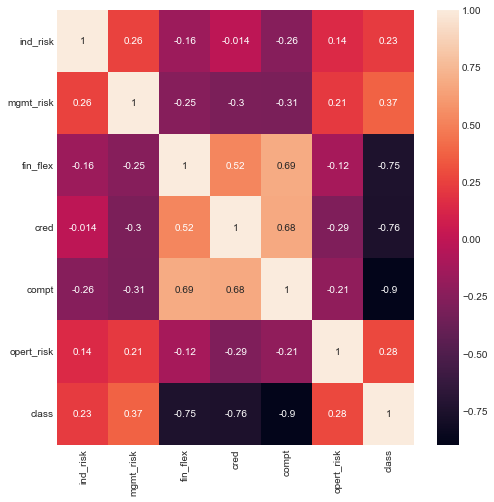

In [86]:
corr= df1.corr()
plt.figure(figsize=(8,8))

sns.heatmap(corr, 
            xticklabels=df1.columns,
            yticklabels=df1.columns,
            annot= True)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


#### Acoording to the correlation matrix these below features are important
- Competitiveness
- credibility
- Financial flexibility

### Feature selection using Chi2 method

In [97]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi= SelectKBest(chi2, k=6)
best_features= chi.fit(x,y)

chi_scores = pd.DataFrame({'features': x.columns, 
                       'Scores': best_features.scores_})

chi_scores.sort_values(by= 'Scores', ascending= False)


,features,Scores
4,compt,82.186252
2,fin_flex,60.237242
3,cred,52.307251
1,mgmt_risk,9.407190
5,opert_risk,6.458129
0,ind_risk,4.225298


#### According to the chi2 method we found below important features
- competitiveness
- financial flexibility
- credibility

### Feature selction using decision tree

In [96]:
tree =  DecisionTreeClassifier()
fit = tree.fit(x,y)

dt_score= pd.DataFrame({'features': x.columns,
                    'Scores': fit.feature_importances_})
dt_score.sort_values(by='Scores', ascending= False)

,features,Scores
4,compt,0.964942
3,cred,0.021987
5,opert_risk,0.013071
0,ind_risk,0.000000
1,mgmt_risk,0.000000
2,fin_flex,0.000000


#### According to the decision tree method below features are important
- Competitiveness
- Credibility
- Financial flexibility

Text(0.5, 1.0, 'chi2 method')

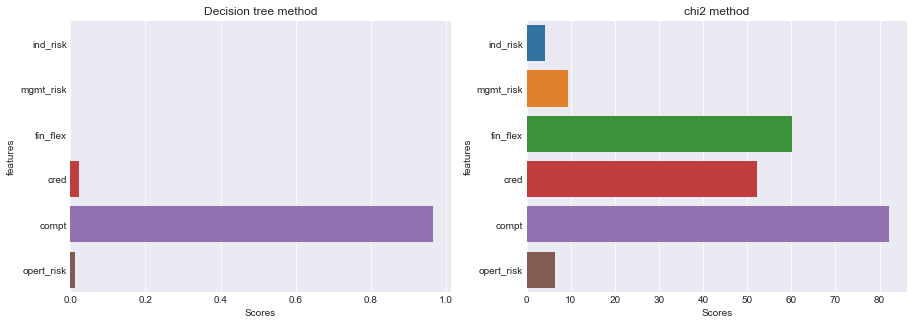

In [104]:
# visualization of all feature selection scores
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,5), facecolor= 'white')

plt.subplot(1,2,1)
sns.barplot(x= dt_score['Scores'], y= dt_score['features'])
plt.title('Decision tree method')

plt.subplot(1,2,2)
sns.barplot(x= chi_scores['Scores'], y= chi_scores['features'])
plt.title('chi2 method')

### with having all the feature selection methods have common results so we will continue with below features
- competitiveness
- Financial flexibility
- credibility

## Model building

In [60]:
df1['class']= df1['class'].map(lambda x: 1 if x=='bankruptcy' else 0 )

In [152]:
# droping all unnecessary features

df1.drop(labels = ['ind_risk', 'mgmt_risk', 'opert_risk'], axis= 1, inplace= True)


In [153]:
df1.head()


,fin_flex,cred,compt,class
0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,1
2,0.0,0.0,0.0,1
3,0.0,0.5,0.0,1
4,0.0,0.0,0.0,1


In [154]:
x= df1.drop(labels = 'class', axis=1)
y = df1['class']

In [155]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, stratify=y)

## Model Building
##### we will use below methods to build the classificartion model

- Logistic regression
- Decision Tree Classifier
- Support Vector machine (SVM)
- Adaboost classification
- K Nearest neighbour

In [156]:
from sklearn.metrics import f1_score, recall_score, accuracy_score

### 1) Logistic regression

In [157]:
model1= LogisticRegression()
model1.fit(x_train, y_train)

log_train_pred= model1.predict(x_train)
log_test_pred= model1.predict(x_test)

log_test_acc = accuracy_score(log_test_pred, y_test)
log_train_acc = accuracy_score(log_train_pred, y_train)

print('Model1 - Logistic regression')
print('*****************************')
print('accuracy score of test data is:', log_test_acc)
print('accuracy score of train data is:', log_train_acc)

Model1 - Logistic regression
*****************************
accuracy score of test data is: 1.0
accuracy score of train data is: 0.995


### 2) Decision Tree classifier

In [158]:
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)


dt_train_pred= model2.predict(x_train)
dt_test_pred= model2.predict(x_test)


dt_test_acc = accuracy_score(dt_test_pred, y_test)
dt_train_acc = accuracy_score(dt_train_pred, y_train)

print('Model2 - Decision tree classification')
print('*****************************')
print('accuracy score of test data is:', dt_test_acc)
print('accuracy score of train data is:', dt_train_acc)

Model2 - Decision tree classification
*****************************
accuracy score of test data is: 1.0
accuracy score of train data is: 1.0


### 3) Support vector machine

In [159]:
from sklearn.svm import SVC

model3= SVC()
model3.fit(x_train,y_train)

sv_train_pred= model3.predict(x_train)
sv_test_pred= model3.predict(x_test)

sv_test_acc = accuracy_score(sv_test_pred, y_test)
sv_train_acc = accuracy_score(sv_train_pred, y_train)

print('Model3 - Support vector machine')
print('*****************************')
print('accuracy score of test data is:', sv_test_acc)
print('accuracy score of train data is:', sv_train_acc)

Model3 - Support vector machine
*****************************
accuracy score of test data is: 1.0
accuracy score of train data is: 1.0


### 4) Adaboost classification

In [160]:
from sklearn.ensemble import AdaBoostClassifier

model4 = AdaBoostClassifier()
model4.fit(x_train, y_train)

ad_test_pred= model4.predict(x_test)
ad_train_pred = model4.predict(x_train)

ad_test_acc  = accuracy_score(ad_test_pred, y_test)
ad_train_acc = accuracy_score(ad_train_pred, y_train)

print('Model4 - Adaboost Classifier')
print('*****************************')
print('accuracy score of test data is:', ad_test_acc)
print('accuracy score of train data is:', ad_train_acc)

Model4 - Adaboost Classifier
*****************************
accuracy score of test data is: 1.0
accuracy score of train data is: 1.0


### 5) KNN

In [161]:
from sklearn.neighbors import KNeighborsClassifier

model5 = KNeighborsClassifier()
model5.fit(x_train, y_train)

kn_test_pred =model5.predict(x_test)
kn_train_pred = model5.predict(x_train)

kn_train_acc = accuracy_score(kn_train_pred, y_train)
kn_test_acc = accuracy_score(kn_test_pred, y_test)

print('Model5 - KNN')
print('*****************************')
print('accuracy score of test data is:', kn_test_acc)
print('accuracy score of train data is:', kn_train_acc)

Model5 - KNN
*****************************
accuracy score of test data is: 1.0
accuracy score of train data is: 0.99


## Model comaprision Dataframe

In [162]:
scores_df = pd.DataFrame({'Models': ['Logistic Model', 'Decision Tree','SVM model', 'AdaBoost Model', 'KNN model'],
                         'Training scores': [log_train_acc, dt_train_acc, sv_train_acc, ad_train_acc, kn_train_acc],
                         'Testing scores': [log_test_acc, dt_test_acc, sv_test_acc, ad_test_acc, kn_test_acc]})
scores_df

,Models,Training scores,Testing scores
0,Logistic Model,0.995,1.0
1,Decision Tree,1.000,1.0
2,SVM model,1.000,1.0
3,AdaBoost Model,1.000,1.0
4,KNN model,0.990,1.0


#### Here we will choose Logistic regression as our final model.

## Model export

In [167]:
import pickle
pickle.dump(model1, open('logistic_model_bankruptcy.pkl', 'wb'))

In [168]:
# testing the pickle file

log_model = pickle.load(open('logistic_model_bankruptcy.pkl', 'rb'))


In [169]:
log_model.predict(x_test)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1], dtype=int64)